In [30]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
data =  "/kaggle/input/butterfly-image-classification"
train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")
print(train.head())
print(test.head())

      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART
      filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg


shape of dataset (6499, 2)
unique specis of butterfly ['SOUTHERN DOGFACE' 'ADONIS' 'BROWN SIPROETA' 'MONARCH'
 'GREEN CELLED CATTLEHEART' 'CAIRNS BIRDWING' 'EASTERN DAPPLE WHITE'
 'RED POSTMAN' 'MANGROVE SKIPPER' 'BLACK HAIRSTREAK' 'CABBAGE WHITE'
 'RED ADMIRAL' 'PAINTED LADY' 'PAPER KITE' 'SOOTYWING' 'PINE WHITE'
 'PEACOCK' 'CHECQUERED SKIPPER' 'JULIA' 'COMMON WOOD-NYMPH' 'BLUE MORPHO'
 'CLOUDED SULPHUR' 'STRAITED QUEEN' 'ORANGE OAKLEAF' 'PURPLISH COPPER'
 'ATALA' 'IPHICLUS SISTER' 'DANAID EGGFLY' 'LARGE MARBLE'
 'PIPEVINE SWALLOW' 'BLUE SPOTTED CROW' 'RED CRACKER' 'QUESTION MARK'
 'CRIMSON PATCH' 'BANDED PEACOCK' 'SCARCE SWALLOW' 'COPPER TAIL'
 'GREAT JAY' 'INDRA SWALLOW' 'VICEROY' 'MALACHITE' 'APPOLLO'
 'TWO BARRED FLASHER' 'MOURNING CLOAK' 'TROPICAL LEAFWING' 'POPINJAY'
 'ORANGE TIP' 'GOLD BANDED' 'BECKERS WHITE' 'RED SPOTTED PURPLE'
 'MILBERTS TORTOISESHELL' 'SILVER SPOT SKIPPER' 'AMERICAN SNOOT' 'AN 88'
 'ULYSES' 'COMMON BANDED AWL' 'CRECENT' 'METALMARK' 'SLEEPY ORANGE'
 'PURPLE 

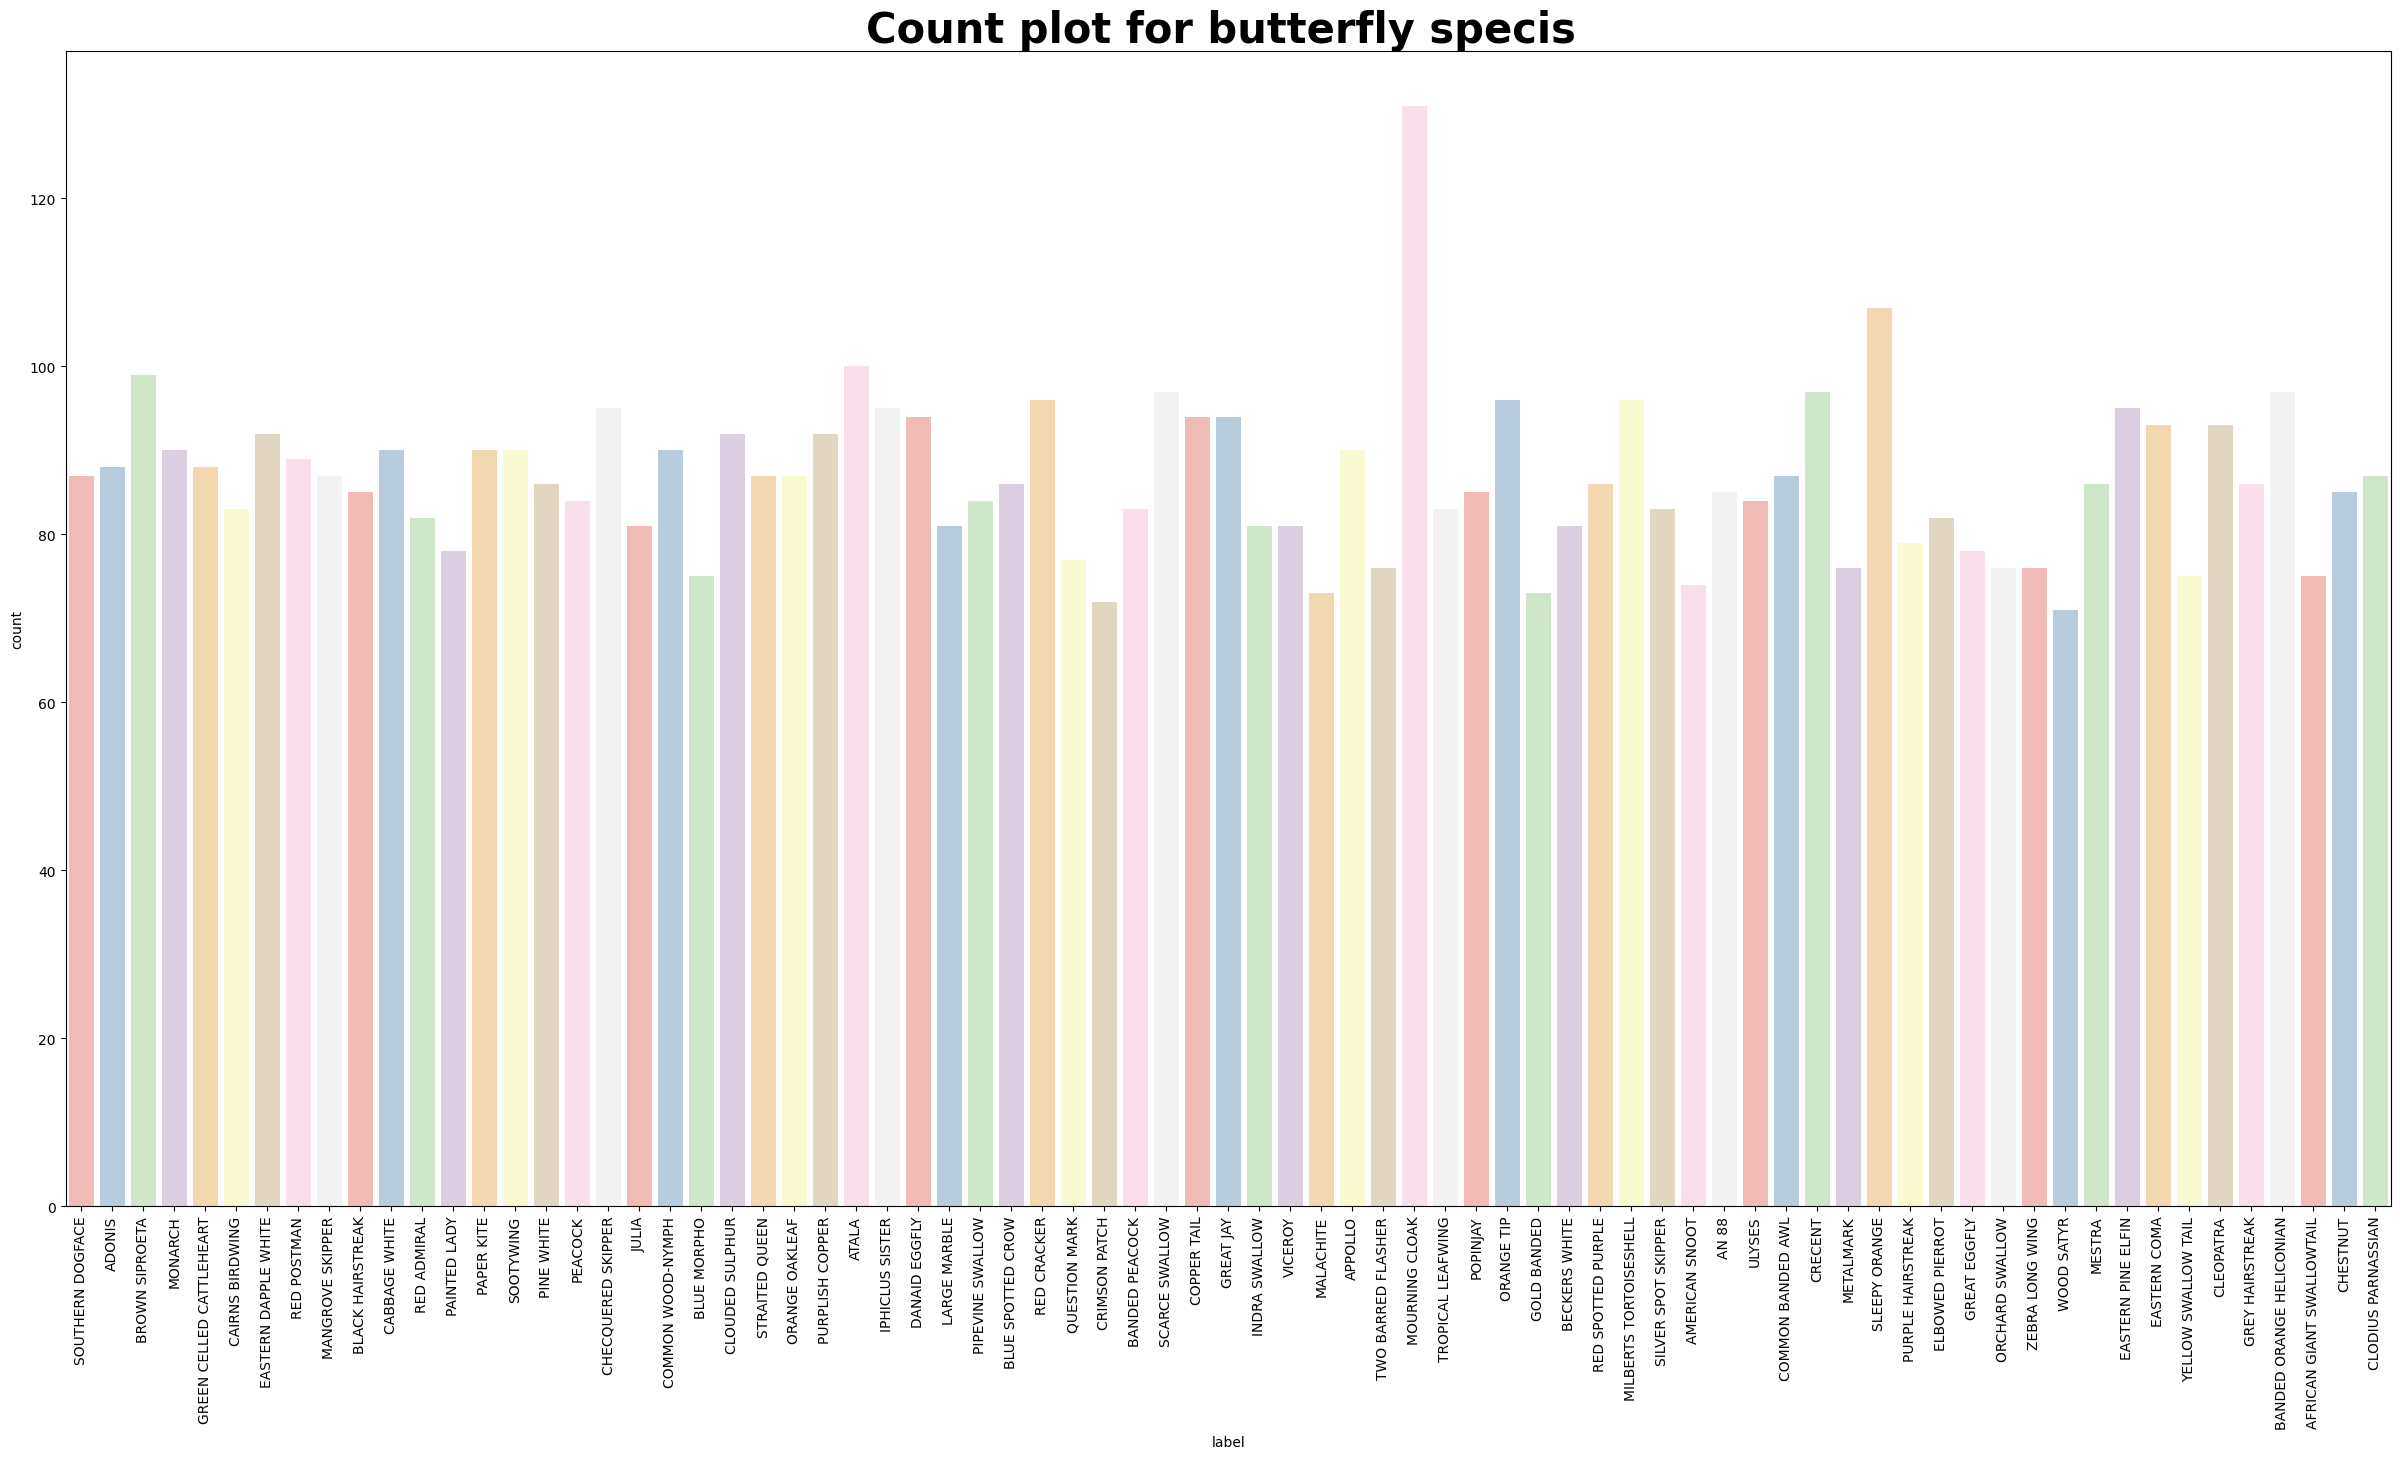

In [4]:
# train dataset
print(f"shape of dataset {train.shape}")
print(f"unique specis of butterfly {train['label'].unique()}")
print(f"values count for each specis {train['label'].value_counts().sort_values(ascending = False)}")
print(f"number of butterfly species {train['label'].nunique()}")
# LETS PLOT COUNT PLOT 
plt.figure(figsize = (30,15))
sns.countplot(x= "label",data=train ,palette = "Pastel1")
plt.xticks(rotation = 90)
plt.title("Count plot for butterfly specis ",fontweight = "bold",fontsize = 30)
plt.show()



In [5]:
# lets understand the test data
print(f"shape of test dataset {test.shape}")
print(f"number of butterflies in test dataset {test.shape[0]}")

shape of test dataset (2786, 1)
number of butterflies in test dataset 2786


In [6]:
img_path = os.path.join(data, "train","Image_1.jpg")
img = Image.open(img_path)
img.size

(224, 224)

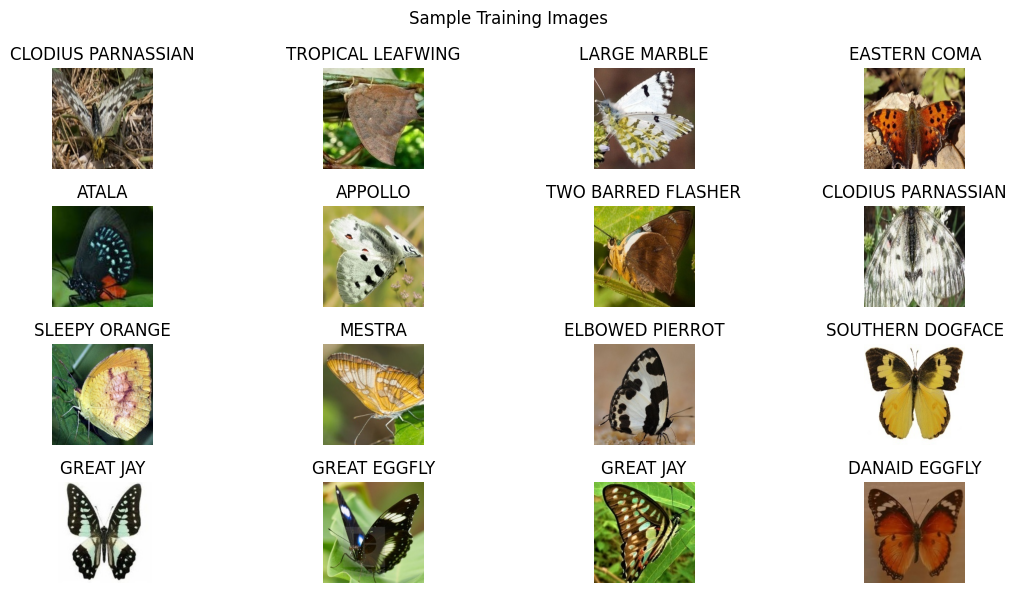

In [7]:
# 
sampledata = train.sample(16, random_state=2)
plt.figure(figsize=(12,6))
for i, row in enumerate(sampledata.itertuples()):
    img_path = os.path.join(data, "train", row.filename)
    img = Image.open(img_path)
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.title(row.label)
    plt.axis("off")
    
plt.suptitle("Sample Training Images")
plt.tight_layout()
plt.show()

In [8]:
# # lets do label encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# train["encode"] = le.fit_transform(train["label"])
# print(train.head(10))
# print(f"lenght of species {len(le.classes_)}")

In [9]:
train


,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./224,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="/kaggle/input/butterfly-image-classification/train",
    x_col="filename",
    y_col="label",
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="/kaggle/input/butterfly-image-classification/train",
    x_col="filename",
    y_col="label",
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)



Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


NameError: name 'test_datagen' is not defined

In [11]:
# lets make a model 
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.models import Sequential


In [12]:
# Get one batch
images, labels = next(train_generator)

print(images.shape)  # shape of batch of images
print(labels.shape)  # shape of batch of labels
dim = images.shape



(32, 224, 224, 3)
(32, 75)


In [13]:


model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3,3), activation="relu", padding="valid", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu", padding="valid"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu", padding="valid"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten before dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(75, activation="softmax"))  # 75 butterfly species



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758707850.648016      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758707850.648734      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 75)             │        19,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,676,683 (170.43 MB)

 Trainable params: 44,676,683 (170.43 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [17]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,batch_size = 50
)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 436ms/step - accuracy: 0.6401 - loss: 1.1999 - val_accuracy: 0.5881 - val_loss: 1.5037
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 440ms/step - accuracy: 0.6618 - loss: 1.1207 - val_accuracy: 0.6051 - val_loss: 1.4021
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 438ms/step - accuracy: 0.6699 - loss: 1.0665 - val_accuracy: 0.6220 - val_loss: 1.3540
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.7192 - loss: 0.9103 - val_accuracy: 0.6197 - val_loss: 1.3674
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.7248 - loss: 0.8891 - val_accuracy: 0.6397 - val_loss: 1.2969
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.7445 - loss: 0.8086 - val_accuracy: 0.6305 - val_loss: 1.3782
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 431ms/step - accuracy: 0.7564 - loss: 0.7863 - val_accuracy: 0.6436 - val_loss: 1.3300
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 426ms/step - accuracy: 0.7624 - loss: 0

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224  # same as training images

# Only rescaling for test images, no augmentation
test_datagen = ImageDataGenerator(rescale=1./255)


In [23]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,  # your test CSV
    directory="/kaggle/input/butterfly-image-classification/test",  # folder containing test images
    x_col='filename',
    y_col=None,
    target_size=(image_size, image_size),
    class_mode=None,
    batch_size=32,
    shuffle=False
)


Found 2786 validated image filenames.


In [24]:
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step


In [34]:
random_images = random.sample("/kaggle/input/butterfly-image-classification/test", 5)
image_size = 224  # same as model input
predicted_labels = []

for img_name in random_images:
    # Load image
    img_path = os.path.join(test, img_name)
    img = load_img(img_path, target_size=(image_size, image_size))
    
    # Convert to array and normalize
    img_array = img_to_array(img) / 255.0
    
    # Add batch dimension (model expects shape (1, 224, 224, 3))
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)[0]
    
    # Map index to class label
    class_labels = list(train_generator.class_indices.keys())
    predicted_labels.append(class_labels[pred_class])


TypeError: expected str, bytes or os.PathLike object, not DataFrame

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


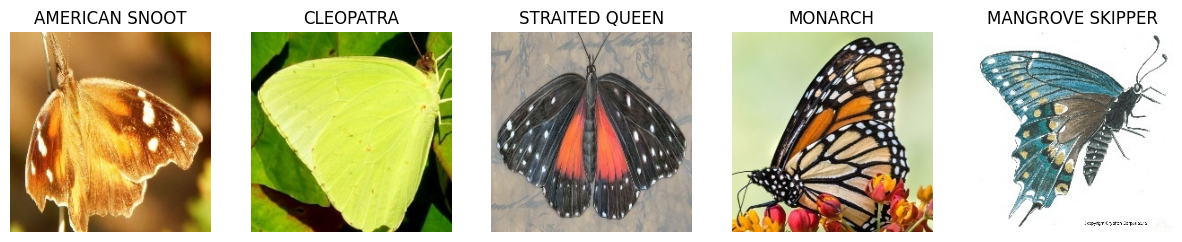

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import os

# Folder containing test images
test_dir = "/kaggle/input/butterfly-image-classification/test"

# List all test image filenames
test_files = os.listdir(test_dir)

# Pick 5 random images
random_images = random.sample(test_files, 5)

image_size = 224
predicted_labels = []

for img_name in random_images:
    # Correct path
    img_path = os.path.join(test_dir, img_name)
    
    # Load and preprocess
    img = load_img(img_path, target_size=(image_size, image_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)[0]
    
    # Map index to class label
    class_labels = list(train_generator.class_indices.keys())
    predicted_labels.append(class_labels[pred_class])

# Display images with predicted labels
plt.figure(figsize=(15,5))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(test_dir, img_name)
    img = load_img(img_path)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(predicted_labels[i])
    plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


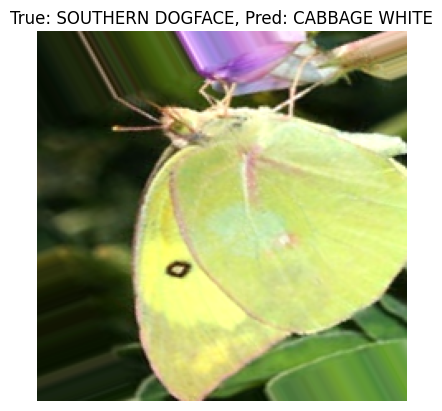

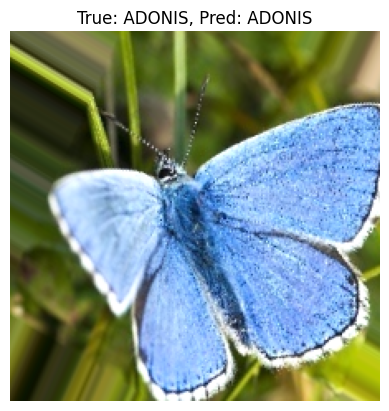

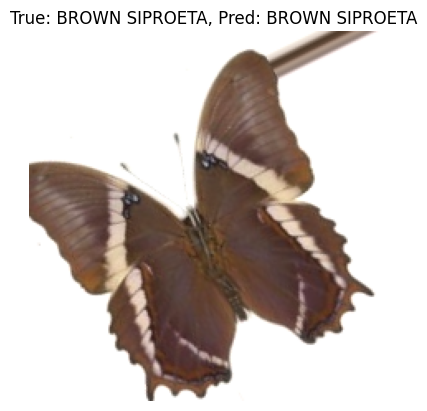

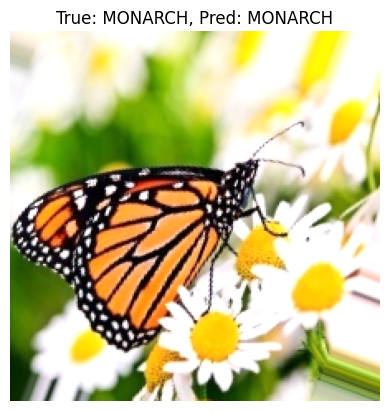

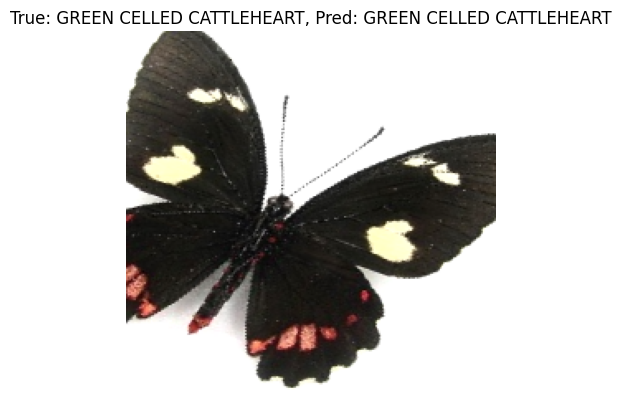

In [36]:
images, labels = next(val_generator)  # one batch from validation set
preds = model.predict(images)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(labels, axis=1)

# Compare
for i in range(5):
    plt.imshow(images[i])
    plt.title(f"True: {class_labels[true_classes[i]]}, Pred: {class_labels[pred_classes[i]]}")
    plt.axis("off")
    plt.show()



In [1]:
plt.figure(figsize=(15,5))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(test_dir, img_name)
    img = load_img(img_path)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(predicted_labels[i])  # predicted species
    plt.axis("off")
plt.show()


NameError: name 'plt' is not defined